# Atividade 4.1. Estimando um Intervalo de Confiança para a Média

Obtenha um conjunto de dados amostrais (por exemplo, pesos de indivíduos, notas de testes, etc.).

Calcule o intervalo de confiança de 95% para a média da população seguindo os passos: \\
* Calcular a média e o desvio padrão da amostra.
* Usar a fórmula para intervalo de confiança ou a biblioteca scipy.stats.
* Desafio: Repetir o processo para diferentes níveis de confiança (por exemplo, 90%, 99%) e comparar os resultados.

Visualizar os intervalos de confiança em um gráfico usando matplotlib para mostrar a variabilidade.

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [ ]:
adult = adult.data.features

In [ ]:
adult['age'].isna().sum()

0

In [ ]:
age = adult['age']

### Verificando a distribuição dos dados

In [ ]:
def plot_hist_normal(data):
  mean = np.mean(data)
  std = np.std(data)
  print(f'Média: {mean}\nDesvio padrão: {std}\n')

  plt.hist(data, bins=30, density=True, alpha=0.6, color='g')

  # curva normal ajustada
  xmin, xmax = plt.xlim()
  x = np.linspace(xmin, xmax, 100)  # vetor de pontos no eixo X
  p = stats.norm.pdf(x, mean, std)  # Função densidade de probabilidade normal

  plt.plot(x, p, 'k', linewidth=2)  # add a curva normal
  plt.title('Histograma e Curva Normal Ajustada')
  plt.show()
  return (mean, std)

Média: 38.64358543876172
Desvio padrão: 13.710369577986512



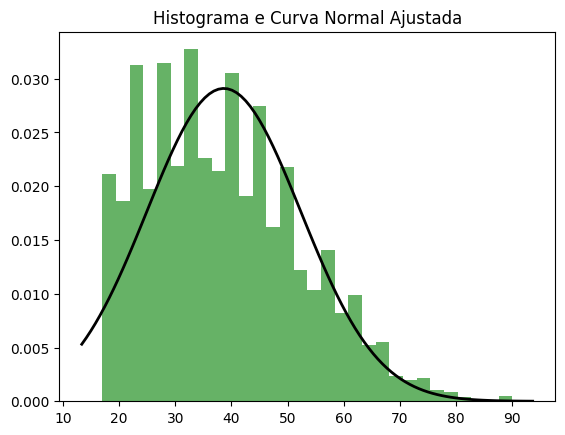

In [ ]:
plot = plot_hist_normal(age)

---
### Calculando o intervalo de confiança com T-Student


$$
IC = \bar{x} \pm t_{\alpha/2} \times \frac{s}{\sqrt{n}}
$$

Onde:
- $\bar{x} $ = média da amostra.
- $t_{\alpha/2} $ = valor crítico t para um intervalo de confiança de $( 1 - \alpha $) (por exemplo, para 95% de confiança, $( \alpha = 0,05 $)).
- $s $ = desvio padrão amostral.
- $n $ = tamanho da amostra.
- $\frac{s}{\sqrt{n}} $ = erro padrão da média.

Essa fórmula nos dá um intervalo no qual, com um determinado nível de confiança, a média da população provavelmente estará.

In [ ]:
# amostras
sample_sizes = [5, 15, 30, 60, 100]

samples = []
for size in sample_sizes:
    samples.append(np.random.choice(age, size=size))

confLevels = [.9, .91, .92, .93, .94, .95, .96, .97, .98, .99]

In [ ]:
def calc_CI_t(confidence_level, data):
    mean_ = data.mean()
    std_ = data.std(ddof=1)  # Graus de liberdade delta = 1
    size = data.size

    df = size - 1

    # Valor crítico t para o nível de confiança especificado
    t_critical = stats.t.ppf(1 - (1 - confidence_level) / 2, df)

    # sdt da média
    std_error = std_ / np.sqrt(size)

    # intervalo de confiança
    ci_lower = mean_ - t_critical * std_error
    ci_upper = mean_ + t_critical * std_error

    return ci_lower, ci_upper

In [ ]:
results = []

for c in confLevels:
    for s in samples:
        interv = calc_CI_t(c, s)
        results.append([c, interv[0], interv[1], len(s), s.mean()])

results_df = pd.DataFrame(results, columns=['conf', 'lim_inf', 'lim_sup', 'tam_amostra', 'média'])
results_df

,conf,lim_inf,lim_sup,tam_amostra,média
0,0.90,21.578346,49.621654,5,35.600000
1,0.90,29.624602,40.375398,15,35.000000
2,0.90,31.815252,39.451415,30,35.633333
3,0.90,32.372735,37.760599,60,35.066667
4,0.90,36.773485,41.686515,100,39.230000
5,0.91,20.958424,50.241576,5,35.600000
6,0.91,29.441618,40.558382,15,35.000000
7,0.91,31.692020,39.574647,30,35.633333
8,0.91,32.287937,37.845396,60,35.066667
9,0.91,36.696911,41.763089,100,39.230000


In [ ]:
import seaborn as sns

In [ ]:
results_df[results_df['conf']==.99]

,conf,lim_inf,lim_sup,tam_amostra,média
45,0.99,5.317793,65.882207,5,35.600000
46,0.99,25.914880,44.085120,15,35.000000
47,0.99,29.439502,41.827164,30,35.633333
48,0.99,30.775705,39.357629,60,35.066667
49,0.99,35.344287,43.115713,100,39.230000


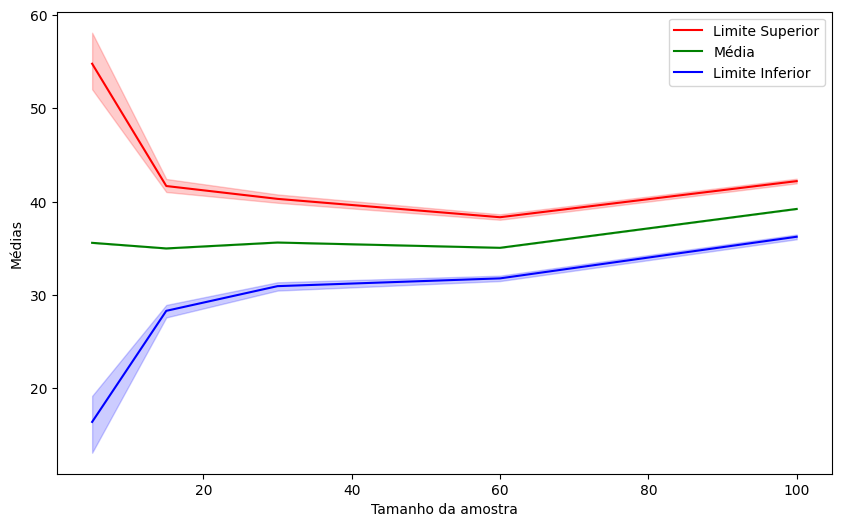

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(data=results_df, x='tam_amostra', y='lim_sup', color='red', label='Limite Superior')
sns.lineplot(data=results_df, x='tam_amostra', y='média', color='green', label='Média')
sns.lineplot(data=results_df, x='tam_amostra', y='lim_inf', color='blue', label='Limite Inferior')
# margens variando em relação aos niveis de confiança

#fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel("Médias")
ax.set_xlabel("Tamanho da amostra")
plt.show()

### Testando com mais dados

sample_sizes:  [15, 100, 3000, 5426, 8140, 12210, 24421] 



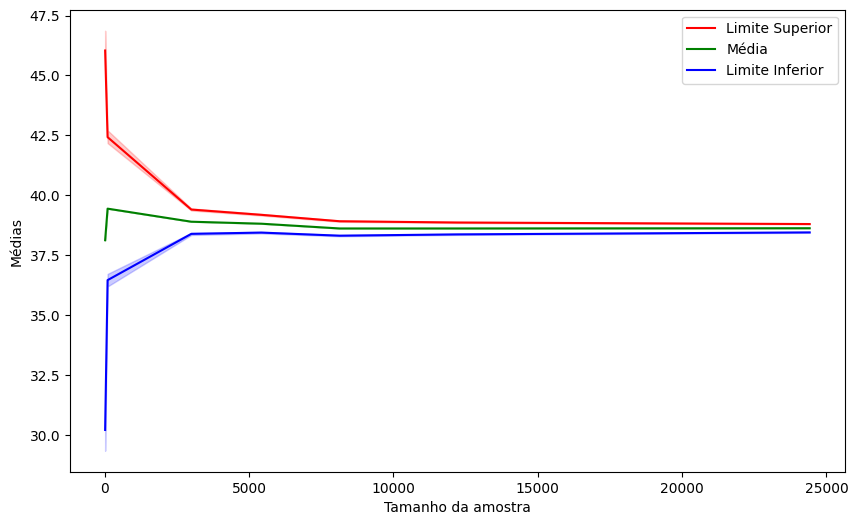

In [ ]:
sample_sizes = [15, 100, 3000, age.shape[0]//9, age.shape[0]//6, age.shape[0]//4, age.shape[0]//2]
print('sample_sizes: ', sample_sizes,'\n')
samples = []
for size in sample_sizes:
    samples.append(np.random.choice(age, size=size))

results = []
for c in confLevels:
    for s in samples:
        interv = calc_CI_t(c, s)
        results.append([c, interv[0], interv[1], len(s), s.mean()])

results_df = pd.DataFrame(results, columns=['conf', 'lim_inf', 'lim_sup', 'tam_amostra', 'média'])

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_ylabel("Médias")
ax.set_xlabel("Tamanho da amostra")

sns.lineplot(data=results_df, x='tam_amostra', y='lim_sup', color='red', label='Limite Superior')
sns.lineplot(data=results_df, x='tam_amostra', y='média', color='green', label='Média')
sns.lineplot(data=results_df, x='tam_amostra', y='lim_inf', color='blue', label='Limite Inferior')

#fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

A variação dos intervalos de confiança diminuem à medida que a população aumenta, assim como a proximidade da média real, mesmo com a variação quanto aos níveis de confiança.

---
# Atividade 4.2. p-value em um Teste de Hipóteses


Forneça dois conjuntos de dados: um para um grupo de controle e outro para um grupo de teste.
Formule a hipótese nula.
Realizar um teste t de duas amostras usando scipy.stats.ttest_ind.

Interpretar o p-value resultante e decidir se rejeitam a hipótese nula em um nível de significância dado (por exemplo, 0,05).

In [ ]:
adult = fetch_ucirepo(id=2)
age = adult.data.features['age']
age.median()

37.0

In [ ]:
# Dados divididos com a mediana
age_control = age[age <= 37]
age_test = age[age > 37]

t_stat, p_value = stats.ttest_ind(age_control, age_test)

# H0: Não existe diferença significativa entre as médias. (nula)
# H1: Existe diferença significativa entre as médias.

nivel_signif = 0.05
if p_value < nivel_signif:
    result = "Rejeita-se a hipótese nula. Existe diferença significativa entre as médias."
else:
    result = "Não se rejeita a hipótese nula. Não existe diferença significativa entre as médias."

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")
print(result)


t-statistic: -314.1201118080425
p-value: 0.0
Rejeita-se a hipótese nula. Existe diferença significativa entre as médias.


Existe diferença significativa entre as médias por se tratar de grupos de idades diferentes, os que tem mais de 37 e os que tem menos de 37 anos.

---
# Atividade 4.3. Faça slides explicando o código abaixo e interpretando os resultados.
https://colab.research.google.com/drive/13V7IT7XbnNVf4VVehObHO6NZUxaqdl_f?usp=sharing \\
Teste com dois valores para significance_level. \\
(Pelo menos quatro slides com a explicação e interpretação.)



## Apresentação: <br>
https://docs.google.com/presentation/d/1rchpGSW8fq68tW1WU03XWbDAWm6PR8tz37nbPyw87m8/edit?usp=sharing